# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Loading


In [2]:
df = pd.read_csv("Global_Mobile_Prices_2025_Extended.csv")
df

,brand,model,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,5g_support,os,processor,rating,release_month,year
0,Oppo,A98 111,855,16,128,108,6000,6.6,33,Yes,Android,Helio G99,3.8,February,2025
1,Realme,11 Pro+ 843,618,6,128,64,4500,6.9,100,Yes,Android,Tensor G4,4.4,August,2025
2,Xiaomi,Redmi Note 14 Pro 461,258,16,64,64,4000,6.8,44,Yes,Android,A18 Pro,4.1,March,2025
3,Vivo,V29e 744,837,6,512,48,4500,6.0,65,Yes,Android,Exynos 2400,4.1,August,2025
4,Apple,iPhone 16 Pro Max 927,335,12,128,200,5000,6.9,100,Yes,iOS,Dimensity 9300,3.5,February,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Google,Pixel 7a 2,961,8,256,12,4000,5.9,44,Yes,Android,Helio G99,4.0,November,2025
996,OnePlus,OnePlus 13R 423,158,16,64,64,5500,5.6,65,Yes,Android,Dimensity 9300,3.5,November,2025
997,Xiaomi,Poco X6 Pro 796,1164,6,128,200,4500,5.7,120,No,Android,Helio G99,4.8,January,2025
998,Realme,Narzo 70 809,895,8,64,48,5000,7.0,65,No,Android,A18 Pro,4.6,August,2025


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1000 non-null   object 
 1   model              1000 non-null   object 
 2   price_usd          1000 non-null   int64  
 3   ram_gb             1000 non-null   int64  
 4   storage_gb         1000 non-null   int64  
 5   camera_mp          1000 non-null   int64  
 6   battery_mah        1000 non-null   int64  
 7   display_size_inch  1000 non-null   float64
 8   charging_watt      1000 non-null   int64  
 9   5g_support         1000 non-null   object 
 10  os                 1000 non-null   object 
 11  processor          1000 non-null   object 
 12  rating             1000 non-null   float64
 13  release_month      1000 non-null   object 
 14  year               1000 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 117.3+ KB


In [4]:
df.isnull().sum()

brand                0
model                0
price_usd            0
ram_gb               0
storage_gb           0
camera_mp            0
battery_mah          0
display_size_inch    0
charging_watt        0
5g_support           0
os                   0
processor            0
rating               0
release_month        0
year                 0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df["brand"].unique()

array(['Oppo', 'Realme', 'Xiaomi', 'Vivo', 'Apple', 'OnePlus', 'Infinix',
       'Samsung', 'Google'], dtype=object)

In [14]:
df['rating'].value_counts()

rating
4.4    77
3.7    77
3.9    75
3.6    73
3.8    71
4.1    70
4.0    68
4.8    68
4.3    66
4.9    58
4.2    58
4.6    57
4.5    55
4.7    52
5.0    45
3.5    30
Name: count, dtype: int64

# Exploratory Data Analyst (EDA)

## 1. BRAND DISTRIBUTION — Jumlah Model per Brand

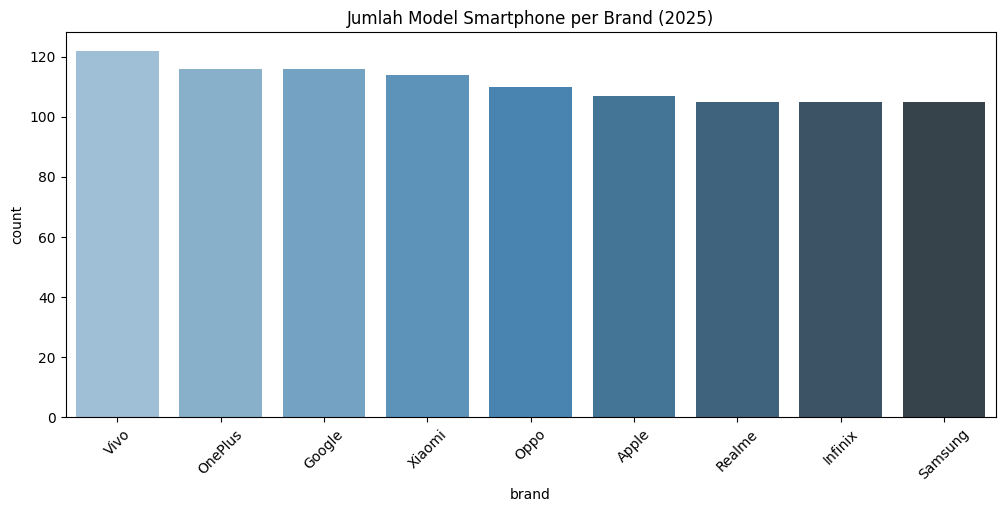

In [8]:
df_brand = df['brand'].value_counts().reset_index()
df_brand.columns = ['brand', 'count']
df_brand

plt.figure(figsize=(12,5))
sns.barplot(data=df_brand, x='brand', y='count', hue='brand', palette='Blues_d', legend=False)
plt.title("Jumlah Model Smartphone per Brand (2025)")
plt.xticks(rotation=45)
plt.show()


---
Berdasarkan distribusi jumlah model per brand, terlihat bahwa Vivo merupakan brand dengan jumlah model smartphone terbanyak pada tahun 2025, diikuti oleh OnePlus, Google, dan Xiaomi. Sementara itu, Oppo, Apple, Realme, Infinix, dan Samsung memiliki jumlah model yang sedikit lebih rendah namun masih relatif seimbang.

Pola ini mengindikasikan bahwa beberapa brand seperti Vivo dan OnePlus mengadopsi strategi portofolio produk yang lebih agresif dengan banyak varian model, kemungkinan untuk menjangkau berbagai segmen harga dan kebutuhan pengguna. Di sisi lain, brand seperti Apple dan Samsung cenderung merilis lebih sedikit model, yang biasanya fokus pada lini produk tertentu namun dengan positioning yang kuat di pasar.

---

## 2. MEDIAN PRICE PER BRAND — Price Positioning

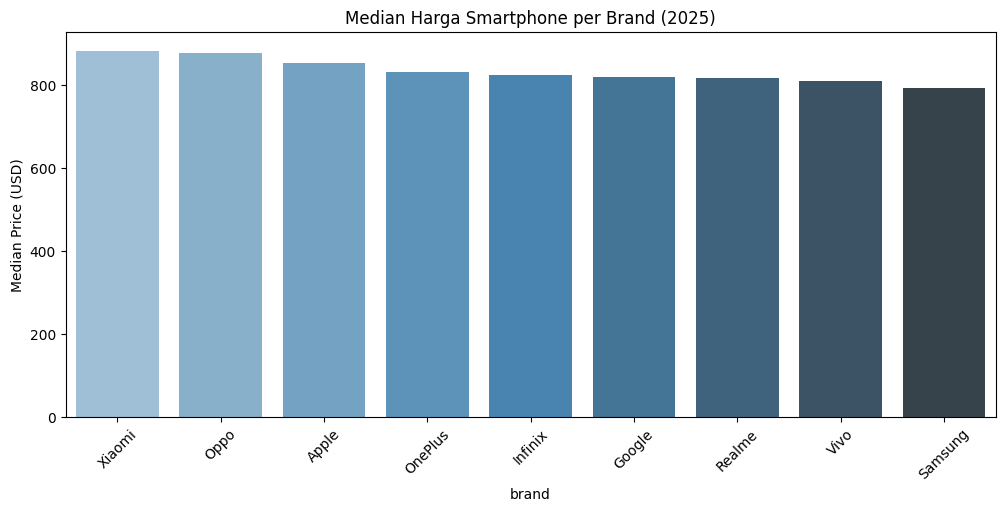

In [9]:
price_brand = df.groupby('brand')['price_usd'].median().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data=price_brand, x='brand', y='price_usd', hue='brand', palette='Blues_d', legend=False)
plt.title("Median Harga Smartphone per Brand (2025)")
plt.xticks(rotation=45)
plt.ylabel("Median Price (USD)")
plt.show()


---
Median harga smartphone tahun 2025 menunjukkan bahwa Xiaomi dan Oppo menempati posisi sebagai brand dengan harga median tertinggi, bahkan melampaui Apple. Hal ini menandakan adanya pergeseran strategi ke arah premium flagship.
Sementara itu, Samsung dan Vivo tercatat memiliki median harga yang relatif lebih rendah, mengindikasikan fokus yang lebih kuat pada segmen mid-range atau value-for-money. Secara keseluruhan, rentang median harga antar brand cukup berdekatan, mencerminkan persaingan ketat dalam pasar smartphone 2025.

---

## 3 MEDIAN RATING PER BRAND — User Satisfaction

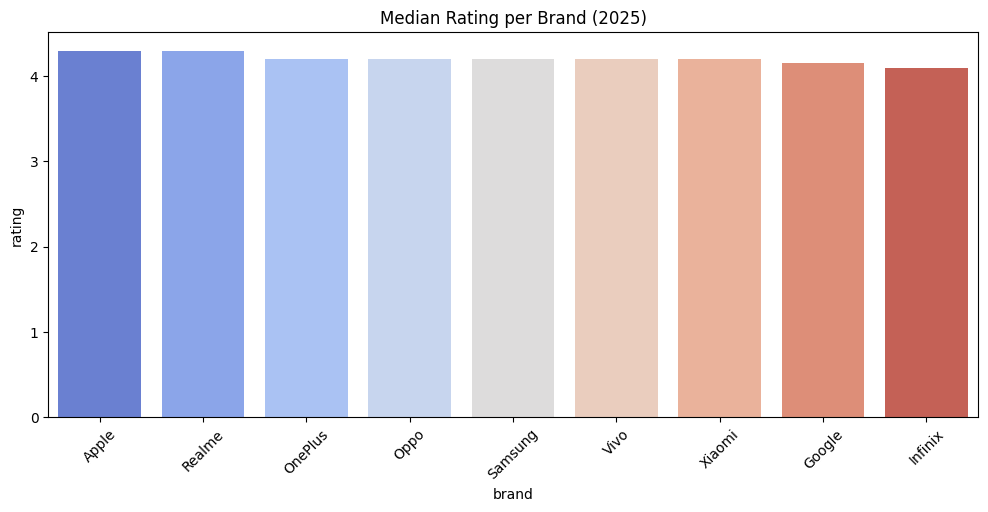

In [10]:
rating_brand = df.groupby('brand')['rating'].median().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data=rating_brand, x='brand', y='rating', hue='brand', palette='coolwarm', legend=False)
plt.title("Median Rating per Brand (2025)")
plt.xticks(rotation=45)
plt.show()


---
Median rating smartphone tahun 2025 menunjukkan bahwa Apple berada di posisi teratas sebagai brand dengan tingkat kepuasan pengguna tertinggi. Realme, OnePlus, dan Oppo menyusul di posisi atas, menegaskan kualitas dan konsistensi produk mereka.

Sementara itu, Samsung, Vivo, Xiaomi, dan Google berada pada kategori rating menengah yang masih cukup stabil. Infinix memiliki rating paling rendah, namun perbedaannya tidak signifikan, menunjukkan kualitas produk yang tetap kompetitif untuk segmen harga yang lebih terjangkau.

---

## 4. Rating per Brand

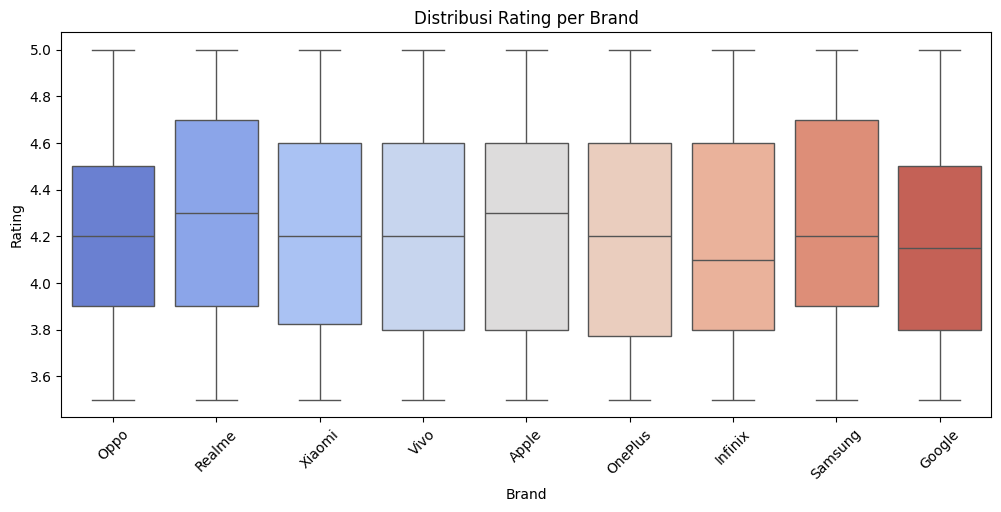

In [11]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='brand', y='rating', hue='brand', palette='coolwarm')
plt.title("Distribusi Rating per Brand")
plt.xlabel("Brand")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()


---
Analisis distribusi rating menunjukkan bahwa Realme dan Samsung memiliki median rating tertinggi sekaligus persebaran yang lebih stabil, menandakan konsistensi kualitas produk.

* Apple dan Oppo juga memiliki rating yang tinggi, namun dengan variasi yang lebih besar antar model, yang dapat mengindikasikan perbedaan kualitas antara lini flagship dan mid-range.
* Xiaomi, Vivo, dan OnePlus berada pada kategori rating menengah dengan performa yang cukup stabil.
* Google dan Infinix memiliki median rating paling rendah, namun selisihnya tidak signifikan. Ini menunjukkan bahwa meskipun kualitas produk mereka tidak sekuat brand lain, pengguna tetap memberikan penilaian yang cukup baik.

---

## 5. Median Rating Berdasarkan Kelompok

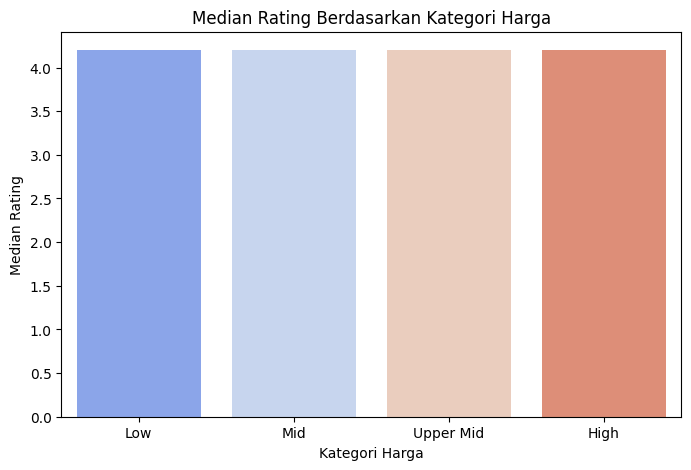

In [12]:
# Buat kategori harga
bins = [0, 300, 600, 1000, 2000]
labels = ['Low', 'Mid', 'Upper Mid', 'High']
df['price_category'] = pd.cut(df['price_usd'], bins=bins, labels=labels)

# Groupby bebas warning
rating_cat = df.groupby('price_category', observed=True)['rating'].median().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    data=rating_cat,
    x='price_category',
    y='rating',
    hue='price_category',
    palette='coolwarm',
    legend=False
)
plt.title("Median Rating Berdasarkan Kategori Harga")
plt.xlabel("Kategori Harga")
plt.ylabel("Median Rating")
plt.show()


---
Analisis median rating berdasarkan kategori harga menunjukkan bahwa tingkat kepuasan pengguna relatif sama di semua segmen harga, mulai dari low-end hingga high-end.
Tidak ada perbedaan signifikan antara smartphone murah, mid-range, maupun flagship, yang mengindikasikan bahwa kualitas pengalaman penggunaan telah meningkat secara merata di seluruh rentang harga.
Hal ini menegaskan bahwa pengguna modern tidak hanya melihat harga sebagai indikator kualitas, dan banyak smartphone mid-range mampu memberikan pengalaman yang setara dengan perangkat premium.

---

## 6. Median Price per RAM

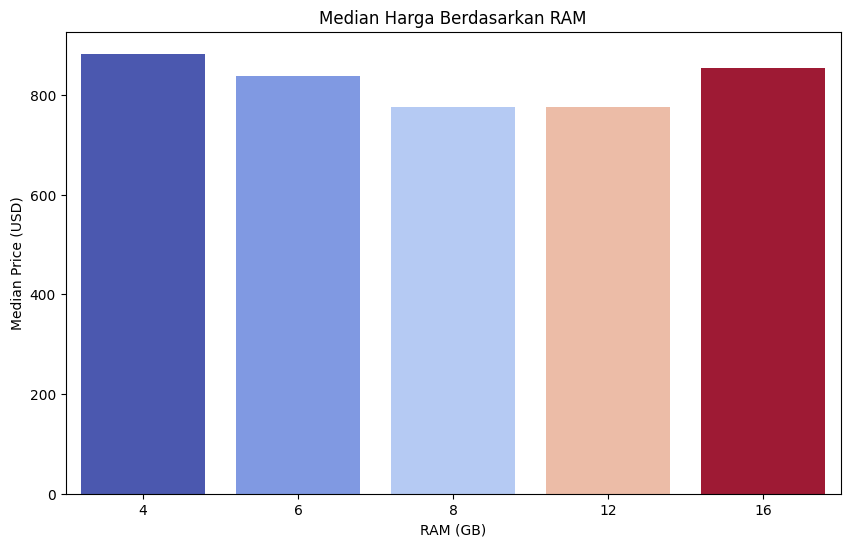

In [13]:
ram_price = df.groupby('ram_gb', observed=True)['price_usd'].median().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=ram_price,
    x='ram_gb',
    y='price_usd',
    hue='ram_gb',
    palette='coolwarm',
    legend=False
)
plt.title("Median Harga Berdasarkan RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("Median Price (USD)")
plt.show()


---
Distribusi median harga berdasarkan kapasitas RAM menunjukkan pola yang tidak linear. Model dengan RAM 4GB justru memiliki median harga tertinggi, kemungkinan disebabkan oleh perangkat dari brand premium seperti Apple yang menggunakan RAM kecil namun tetap dipasarkan sebagai flagship.

RAM 6GB dan 8GB menjadi kategori dengan median harga lebih rendah, menunjukkan bahwa segmen mid-range memberikan value for money terbaik. Kemudian harga kembali meningkat pada RAM 12GB dan 16GB, sejalan dengan peningkatan fitur dan positioning sebagai perangkat high-end.

Temuan ini mengindikasikan bahwa RAM bukan satu-satunya penentu harga smartphone; brand positioning dan fitur keseluruhan memiliki pengaruh yang jauh lebih besar.

---

# **Conclusion**



### Analisis smartphone market 2025 menunjukkan bahwa kualitas smartphone di semua brand dan kategori harga kini sangat merata, dibuktikan dengan rating median di atas 4 pada seluruh segmen, sehingga harga tidak lagi menjadi penentu utama kepuasan pengguna. Segmen mid-range tampil sebagai “sweet spot” karena menawarkan value terbaik dengan harga moderat dan rating yang stabil, menjadikannya pusat persaingan terbesar. Meskipun beberapa model RAM kecil seperti 4GB memiliki harga lebih tinggi karena berasal dari brand premium, hal ini menegaskan bahwa harga lebih dipengaruhi oleh positioning brand, desain, kamera, dan ekosistem daripada spesifikasi teknis. Dengan kualitas yang semakin homogen, brand perlu fokus pada diferensiasi pengalaman pengguna, optimasi software, dan membangun ekosistem agar tetap kompetitif. Sementara itu, bagi bisnis retail, peluang terbesar ada pada promosi produk mid-range dan edukasi konsumen bahwa smartphone modern—bahkan yang lebih murah—sudah mampu memberikan performa yang sangat baik. Secara keseluruhan, pasar smartphone 2025 menegaskan bahwa kompetisi bukan lagi pada angka spesifikasi, tetapi pada value, pengalaman, dan strategi branding yang tepat sasaran.
